In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(5)
np.random.seed(42)

In [3]:
batch_size = 50
x = np.random.normal(2, 0.1, 500)
x_data = tf.keras.Input(shape=(1, ))

a1 = tf.Variable(tf.random.normal(shape=[1, 1], seed=5))
b1 = tf.Variable(tf.random.uniform(shape=[1, 1], seed=5))
a2 = tf.Variable(tf.random.normal(shape=[1, 1], seed=5))
b2 = tf.Variable(tf.random.uniform(shape=[1, 1], seed=5))

In [4]:
class MyCustomGrateSigmoid(tf.keras.layers.Layer):
    def __init__(self, units, a1, b1):
        super(MyCustomGrateSigmoid, self).__init__()
        self.units = units
        self.a1 = a1
        self.b1 = b1

    def call(self, inputs):
        """ Compute f(x) = sigmoid(a1 * x + b1) """
        return tf.math.sigmoid(inputs * self.a1 + self.b1)


In [11]:
# add a layer which computes f(x) = sigmoid(a1 * x + b1)
my_custom_gate_sigmoid = MyCustomGrateSigmoid(units=1, a1=a1, b1=b1)
outputs_sigmoid = my_custom_gate_sigmoid(x_data)

In [6]:
# build the model
model_sigmoid = tf.keras.Model(inputs=x_data, outputs=output_sigmoid, name="gate_sigmoid")

In [7]:
class MyCustomGateRelu(tf.keras.layers.Layer):
    def __init__(self, units, a2, b2):
        super(MyCustomGateRelu, self).__init__()
        self.units = units
        self.a2 = a2
        self.b2 = b2

    def call(self, inputs):
        """ Compute f(x) = relu(a2 * x + b2) """
        return tf.nn.relu(inputs * self.a2 + self.b2)

In [8]:
my_custom_gate_relu = MyCustomGateRelu(units=1, a2=a2, b2=b2)
outputs_relu = my_custom_gate_relu(x_data)

In [9]:
model_relu = tf.keras.Model(inputs=x_data, outputs=outputs_relu, name="gate_relu")

In [10]:
optimizer = tf.keras.optimizers.SGD(0.01)

In [12]:
# run loop across gate
print('\n Optimizing Sigmoid AND Relu Output to 0.75')
loss_vec_sigmoid = []
loss_vec_relu = []

activation_sigmoid = []
activation_relu = []

for i in range(500):
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])

    # open a GRadient tape
    with tf.GradientTape(persistent=True) as tape:
        output_sigmoid = model_sigmoid(x_vals)
        output_relu = model_relu(x_vals)

        loss_sigmoid = tf.reduce_mean(tf.square(tf.subtract(output_sigmoid, 0.75)))
        loss_vec_sigmoid.append(loss_sigmoid)

        loss_relu = tf.reduce_mean(tf.square(tf.subtract(output_relu, 0.75)))
        loss_vec_relu.append(loss_relu)

    gradients_a1 = tape.gradient(loss_sigmoid, my_custom_gate_sigmoid.a1)
    gradients_b1 = tape.gradient(loss_sigmoid, my_custom_gate_sigmoid.b1)

    gradients_a2 = tape.gradient(loss_relu, my_custom_gate_relu.a2)
    gradients_b2 = tape.gradient(loss_relu, my_custom_gate_relu.b2)

    optimizer.apply_gradients(zip([gradients_a1, gradients_b1], [my_custom_gate_sigmoid.a1, my_custom_gate_sigmoid.b1]))
    optimizer.apply_gradients(zip([gradients_a2, gradients_b2], [my_custom_gate_relu.a2, my_custom_gate_relu.b2]))

    output_sigmoid = model_sigmoid(x_vals)
    output_relu = model_relu(x_vals)

    activation_sigmoid.append(np.mean(output_sigmoid))
    activation_relu.append(np.mean(output_relu))

    if i%50==0:
        print('sigmoid = ' + str(np.mean(output_sigmoid)) + 'relu = ' + str(np.mean(output_relu)))


 Optimizing Sigmoid AND Relu Output to 0.75
sigmoid = 0.053502936relu = 0.41717994
sigmoid = 0.06592579relu = 0.74954367
sigmoid = 0.07885077relu = 0.7502562
sigmoid = 0.10079076relu = 0.75001615
sigmoid = 0.13066593relu = 0.74857485
sigmoid = 0.18301637relu = 0.7482997
sigmoid = 0.26148313relu = 0.7496901
sigmoid = 0.36430547relu = 0.75106066
sigmoid = 0.46104252relu = 0.74935675
sigmoid = 0.53752536relu = 0.7483227


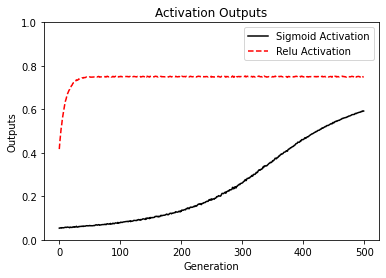

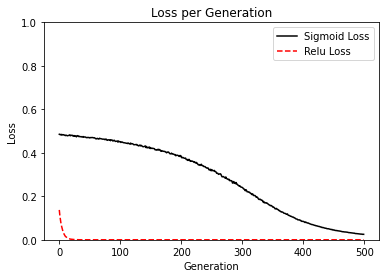

In [13]:
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(activation_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Loss')
plt.plot(loss_vec_relu, 'r--', label='Relu Loss')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()